<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/KaggleTitanic/KaggleTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries we will use

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from collections import Counter #for function

import warnings
warnings.filterwarnings('ignore')

Import the 3 data sets that are given via https://www.kaggle.com/c/titanic/data

In [2]:
#Reading the files given:
train_df             = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTrain.csv")
test_df              = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTest.csv")
sample_submission_df = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicSampleSubmission.csv")

In [3]:
#Output verification of datasets imported and read
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Note that the 'Test' set is missing the 'Survived' Column as it is the target/response variable that is in question.

In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
#Shows the output form: 2 columns = PassengerId and Survived column, with test_df amount of rows.
#The shape that is desired.
sample_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0




---
*Data Description found on* https://www.kaggle.com/c/titanic/data

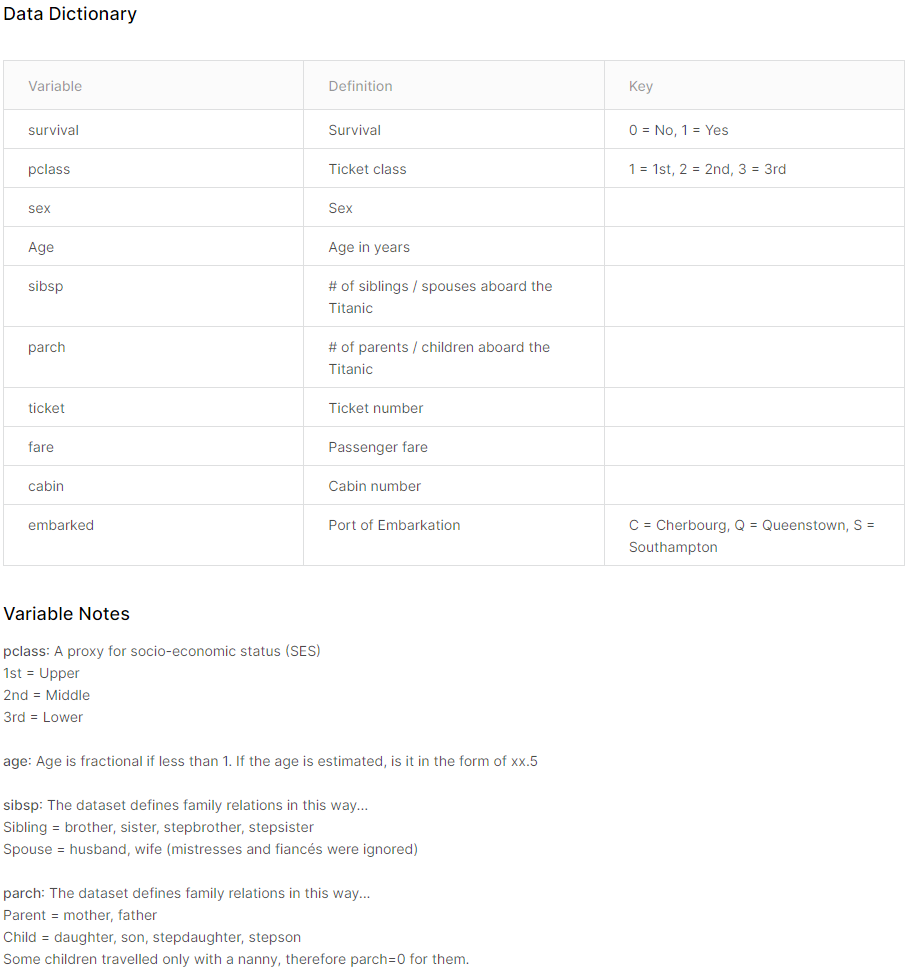

---

Determine information about the data we are using

In [6]:
# train_df information/description:
train_df.info()

# check missing values in training data
print("\n\nMissing Values: ")
print(train_df.isnull().sum())

# describe the inforamtion
print("\n\n")
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color='gray'>Here we can see that Age , Cabin, and Emabrked are the only columns with NULL/empty data. </font>


---



In [7]:
# test_df information/description:
test_df.info()

# check missing values in training data
print("\n\nMissing Values: ")
print(test_df.isnull().sum())

# describe the inforamtion
print("\n\n")
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64





,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<font color='gray'>Here we can see that Age , Cabin, and Fare are the only columns with NULL/empty data. </font>



---




In [8]:
#Numerical and Categorical Values Separated Accordingly
numericals_df = train_df[['Age', 'SibSp', 'Parch', 'Fare']] #PassengerId not needed #histograms
categoricals_df = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']] #value counts

print("Numericals:\n" , numericals_df)
print("\nCategoricals: \n" , categoricals_df)

Numericals:
       Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]

Categoricals: 
      Survived  Pclass     Sex            Ticket Cabin Embarked
0           0       3    male         A/5 21171   NaN        S
1           1       1  female          PC 17599   C85        C
2           1       3  female  STON/O2. 3101282   NaN        S
3           1       1  female            113803  C123        S
4           0       3    male            373450   NaN        S
..        ...     ...     ...               ...   ...      ...
886         0       2    male            211536   NaN        S
887         1       1  female            11205

Age Distribution w/ Density Curve (Red):
Age Min:  0.42
Age Max:  80.0


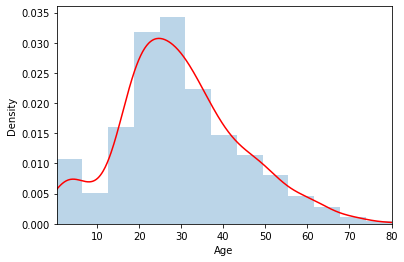

SibSp Distribution w/ Density Curve (Red):
SibSp Min:  0
SibSp Max:  8


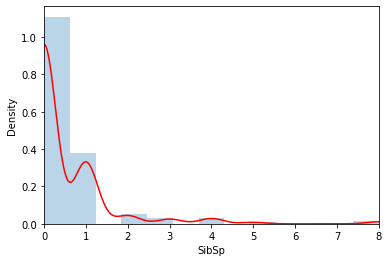

Parch Distribution w/ Density Curve (Red):
Parch Min:  0
Parch Max:  6


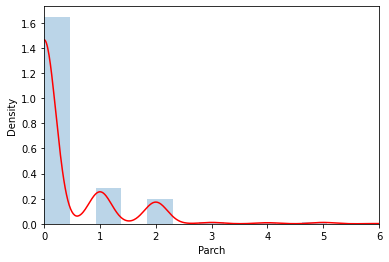

Fare Distribution w/ Density Curve (Red):
Fare Min:  0.0
Fare Max:  512.3292


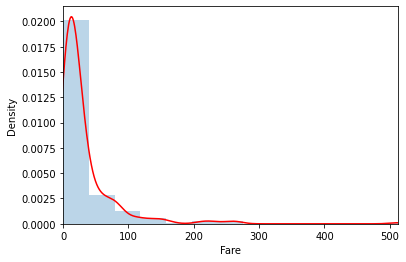

In [9]:
#Histogram showing distribution of all INITIAL '[Numerical Column Name]' with the density curve plotted against it
for col in numericals_df.columns:
  print( col, "Distribution w/ Density Curve (Red):")
  print( col, "Min: ", train_df[col].min())
  print( col, "Max: ", train_df[col].max())
  ax = train_df[col].hist(bins=13, density=True, alpha=0.3) # Histogram
  train_df[col].plot(kind='density', color='red') #Density curve
  ax.set(xlabel= col) #X-Axis label
  plt.xlim(train_df[col].min(),train_df[col].max()) # Limits of values for the X - Axis
  plt.show()    

Survived Bar Chart:


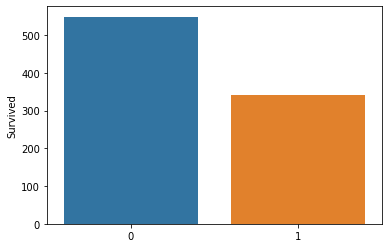

Pclass Bar Chart:


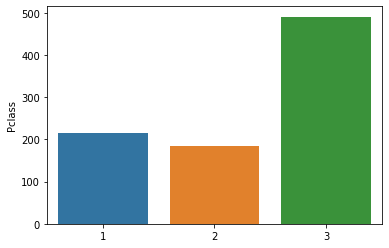

Sex Bar Chart:


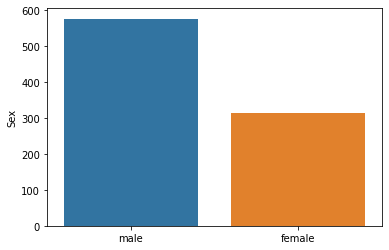

Ticket Bar Chart:


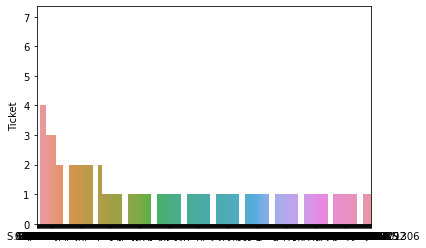

Cabin Bar Chart:


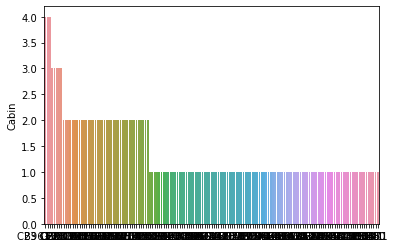

Embarked Bar Chart:


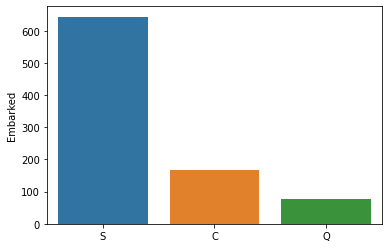

In [10]:
#Categoricals shown
for col in categoricals_df.columns:
  print( col, "Bar Chart:")
  #barplot(column name info, column name counts)
  sns.barplot(categoricals_df[col].value_counts().index , categoricals_df[col].value_counts())
  plt.show()

---

Probability of Survival by Sex:
       Sex  Survived
0  female  0.742038
1    male  0.188908 




Text(0.5, 1.0, 'Probability of Survival by Sex')

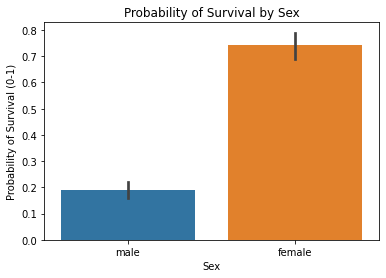

In [11]:
print("Probability of Survival by Sex:\n", train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Sex' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Probability of Survival by Sex")

Probability of Survival by Class:
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 




Text(0.5, 1.0, 'Probability of Survival by Class')

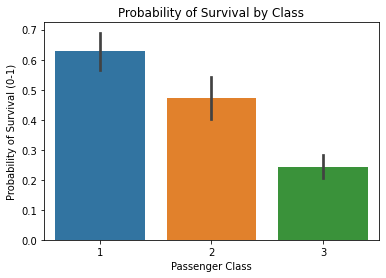

In [12]:
print("Probability of Survival by Class:\n", train_df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Pclass' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Passenger Class')
plt.title("Probability of Survival by Class")

Probability of Survival by Embarked:
   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 




Text(0.5, 1.0, 'Probability of Survival by Embarked')

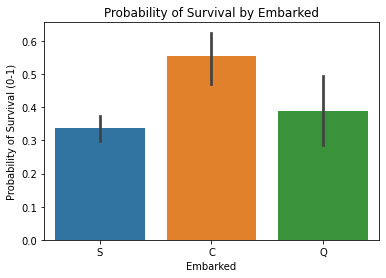

In [13]:
#Mean of survival  by categoricals
print("Probability of Survival by Embarked:\n", train_df[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Embarked' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Probability of Survival by Embarked")

---

Count Amount of Sex-By-Class:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Class:
               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447 



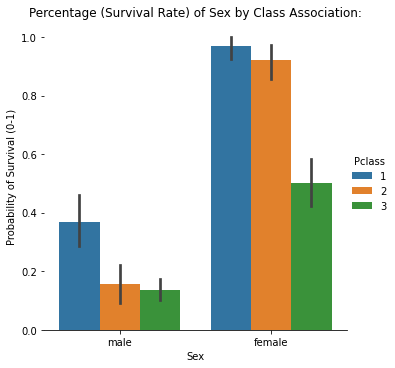

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Class:
               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447 



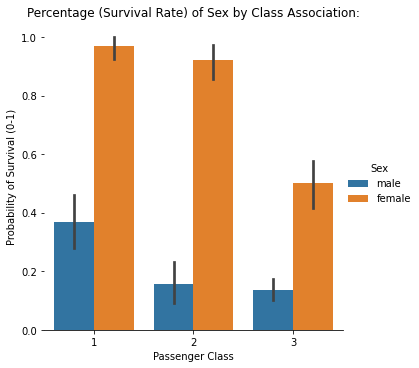

In [14]:
#Did class affect the survival percentage by sex?

#Count
print("Count Amount of Sex-By-Class:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Pclass", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")

#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Class:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Pclass"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Class:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Pclass", 'Sex'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Passenger Class')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()


Count Amount of Sex-By-Embarked:
Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Embarked:
                 Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603 



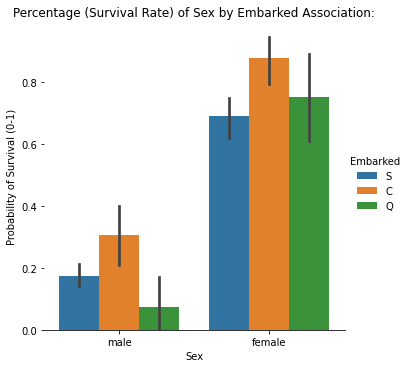

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Embarked:
                 Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603 



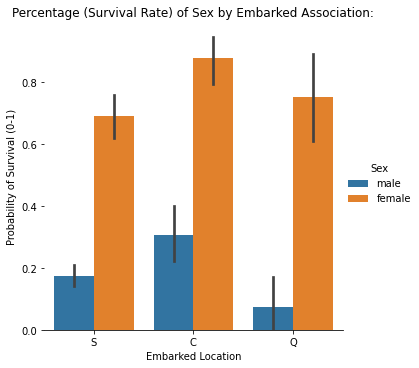

In [15]:
#Did embarking-from location affect the survival percentage by sex?

print("Count Amount of Sex-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Embarked", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")


#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Embarked"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Sex by Embarked Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Embarked", 'Sex'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Embarked Location')
plt.title("Percentage (Survival Rate) of Sex by Embarked Association:")
plt.show()


Count Amount of Class-By-Embarked:
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Class by Embarked:
                 Survived
Pclass Embarked          
1      C         0.694118
       Q         0.500000
       S         0.582677
2      C         0.529412
       Q         0.666667
       S         0.463415
3      C         0.378788
       Q         0.375000
       S         0.189802 



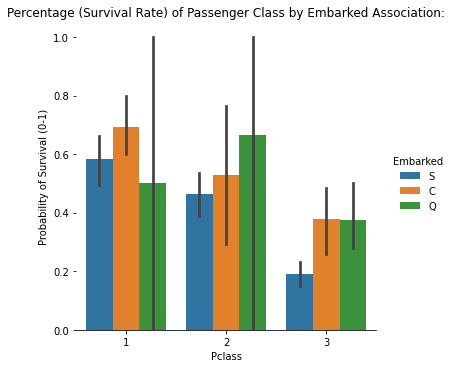

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Class by Embarked:
                 Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802 



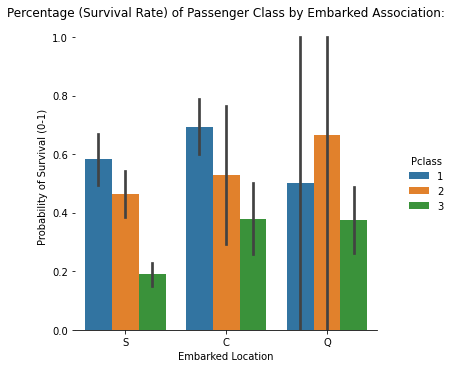

In [17]:
#Did certain Embarking locations have higher survival rates based on the class association?

print("Count Amount of Class-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Pclass", columns = "Embarked", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")


#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Class by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Pclass", "Embarked"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Embarked', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Class by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Embarked", 'Pclass'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Embarked Location')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()



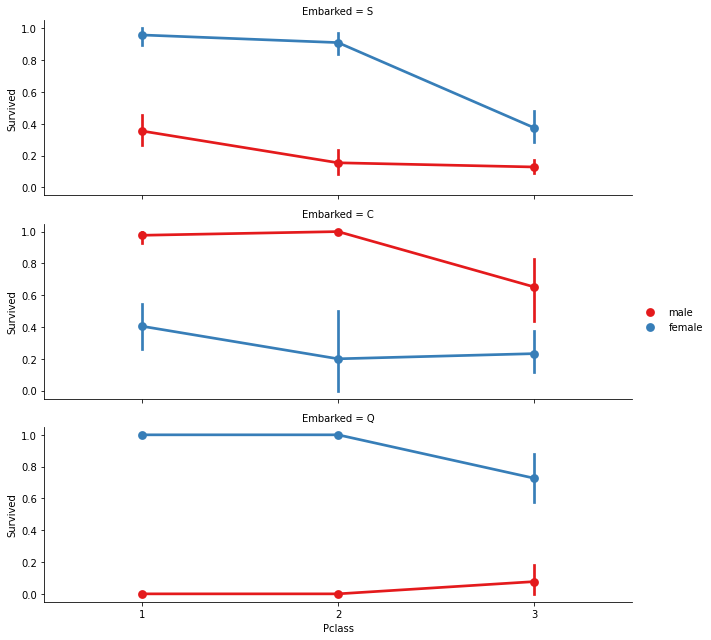

In [16]:
#Overall Survival Percentage by Sex (color) by Class (X-Axis) by Embarked (Graph#)
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 3.0, aspect = 3.0)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'Set1')
grid.add_legend()

In [18]:
#Removing Outliers function

#Found this while looking at other notebooks and felt it was very useful

def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)
train_df.loc[outliers_to_drop, :]

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
#Drop outliers so we can analyze the numericals better

print("Before: {} rows".format(len(train_df)))

train_df = train_df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

print("After: {} rows".format(len(train_df)), "\n\n")

train_df.info()

Before: 891 rows
After: 881 rows 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB




---



---



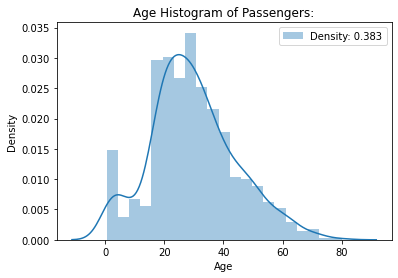

Age histograms by Deceased (0) and Survived (1):


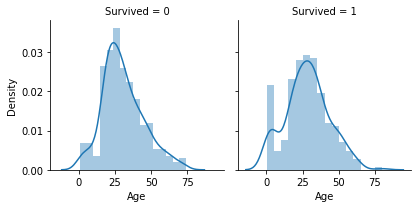

Age histograms by Passenger Class:


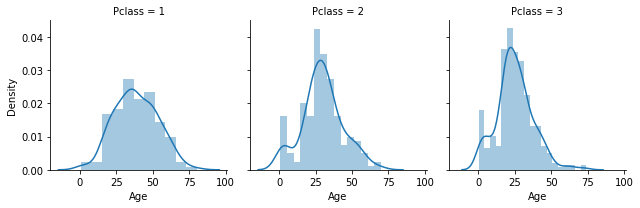

Age histograms by Embarked Location:


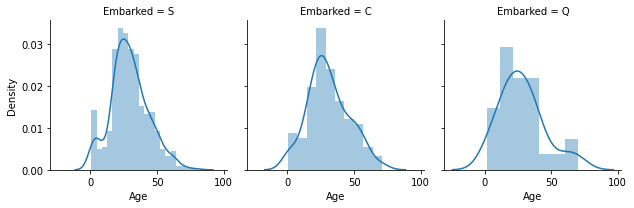




Line graph showing the density curves for ages of those who survived vs those who died


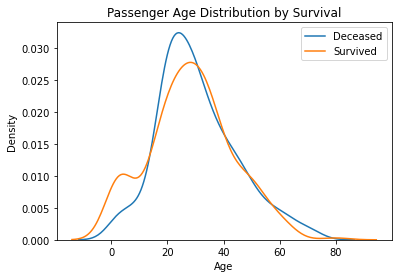

In [25]:
#Numericals : Age , SibSp , Parch , Fare
#1 Age
sns.distplot(train_df['Age'], label = 'Density: %.3f'%(train_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Histogram of Passengers:')
plt.show()

#Age density by Survived/Deceased
print('Age histograms by Deceased (0) and Survived (1):')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Survived')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Age density by Passenger Class
print('Age histograms by Passenger Class:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Pclass')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Age density by Embarked location
print('Age histograms by Embarked Location:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Embarked')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Line graph showing the density curves for ages of those who survived vs those who died
print("\n\n")
print('Line graph showing the density curves for ages of those who survived vs those who died')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 0], label = 'Deceased')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Passenger Age Distribution by Survival')
plt.legend()
plt.show()

Probability of survival by combined siblings + spouse:
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.153846
4      4  0.166667
5      5  0.000000 




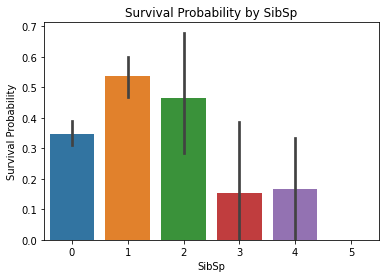

In [173]:
#SibSp
print("Probability of survival by combined siblings + spouse:")
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean(),"\n\n")

sns.barplot(x = 'SibSp', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')
plt.show()

Probability of survival by combined parents + children:
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.542857
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 




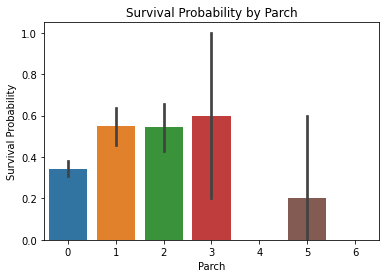

In [174]:
#Parch
print("Probability of survival by combined parents + children:")
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index = False).mean(),"\n\n")

sns.barplot(x = 'Parch', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
plt.show()

The number of null values in the 'Fare' column is:  0


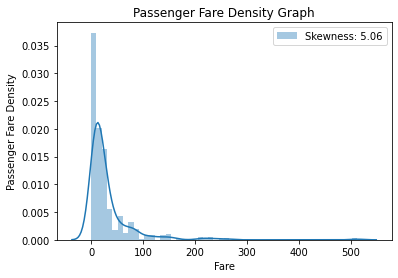

In [180]:
#Fare
#check the amount of nulls as there were nulls before
print("The number of null values in the 'Fare' column is: ", train_df['Fare'].isnull().sum())

sns.distplot(train_df['Fare'], label = 'Skewness: %.2f'%(train_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Density')
plt.title('Passenger Fare Density Graph')
plt.show()

In [138]:
#Data Preprocessing
#Start by checking the values that are null
# check missing values in training data
print("Missing Values: ")
print(train_df.isnull().sum())

#create copy of train_df
training_dataframe = train_df.copy()

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


In [ ]:
#First we will fill in the Embarked Nulls with the mode of the rest of the data for that column
#1. Determine the mode
mode_embarked = training_dataframe['Embarked'].dropna().mode()[0]

#2. Fill in the Nulls with the 'Determined Mode'
training_dataframe['Embarked'].fillna(mode_embarked, inplace = True)

#3. Show the output of null values remaining:
print("Missing Values: ")
print(training_dataframe.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
#Might not need to do this just yet...

#First we will fill in the Age Nulls with the median of the rest of the data for that column
#1. Determine the median
training_dataframe["Age"].fillna(training_dataframe["Age"].median(skipna=True), inplace=True)

#2. Show the output of null values remaining:
print("Missing Values: ")
print(training_dataframe.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
#Changing Embarked -> Embarked_C , Embarked_Q, and Embarked_S

training_dataframe =pd.get_dummies(train_data, columns=["Embarked"])
print(training_dataframe.info())
print(training_dataframe.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB
None
   PassengerId  Survived  Pclass  ... Embarked_C Embarked_Q  Embarked_S
0            1         0       3  ...          0          0           1
1

In [ ]:
clf1 = LogisticRegression(solver='lbfgs', max_iter=10000)
clf1.fit(training, train_df['Survived'] )

LogisticRegression(max_iter=10000)

# Mapping Values to 0/1

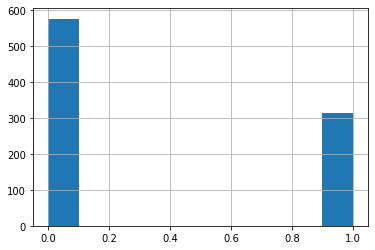

In [ ]:
testing = train_data.copy()
testing['Sex'] = testing['Sex'].apply({'male':0, 'female':1}.get)
testing['Sex'].hist()

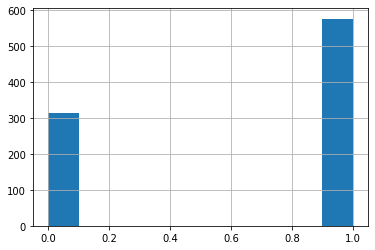

In [ ]:
testing = train_data.copy()
testing['Sex']=testing['Sex'].map({'female':0,'male':1})
testing['Sex'].hist()

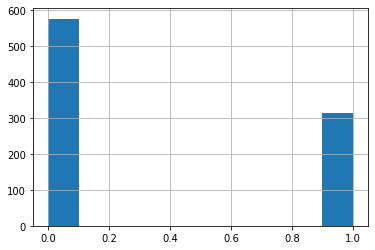

In [ ]:
testing = train_data.copy()
testing['Sex'].replace(['male', 'female'], [0,1],inplace=True)
testing['Sex'].hist()

## Test Data

In [ ]:
TitanicTest = pd.read_csv('TitanicTest.csv')

In [ ]:
print("Missing Values: ")
print(TitanicTest.isnull().sum())

Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
test_data = TitanicTest.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing.drop(columns=['PassengerId', 'Pclass', 'Name',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    object 
 1   Age         418 non-null    float64
 2   Embarked_C  418 non-null    uint8  
 3   Embarked_Q  418 non-null    uint8  
 4   Embarked_S  418 non-null    uint8  
dtypes: float64(1), object(1), uint8(3)
memory usage: 7.9+ KB
None
      Sex   Age  Embarked_C  Embarked_Q  Embarked_S
0    male  34.5           0           1           0
1  female  47.0           0           0           1
2    male  62.0           0           1           0
3    male  27.0           0           0           1
4  female  22.0           0           0           1


In [ ]:
predict = clf1.predict(testing)

In [ ]:
TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('Titanic2.csv', index=False, header=True)